#IMPORT LIBRARIES

This is the libraries which will be needed or not to use in NutriBalance

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from tensorflow.keras import mixed_precision
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
# This codes are to check the version of libraries
print("The numpy version is " + np.__version__)
print("The tensorflow version is " + tf.__version__)
print("The pandas version is " + pd.__version__)

The numpy version is 1.23.5
The tensorflow version is 2.14.0
The pandas version is 1.5.3


##DATA COLLECTING

We use TensorFlow Dataset Food101

In [ ]:
dataset_food101 = tfds.list_builders()
print("food101" in dataset_food101)

True


In [ ]:
#import dataset food101 from Tensorflow Dataset
(train_data, validation_data), ds_info = tfds.load(name="food101",
                                             split=["train","validation"],
                                             shuffle_files=True,
                                             as_supervised=True,
                                             with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteTPVNMX/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteTPVNMX/food101-validation.tfrecord*...:   0%|     …

In [ ]:
figure_of_train_data = tfds.show_examples(train_data, ds_info)

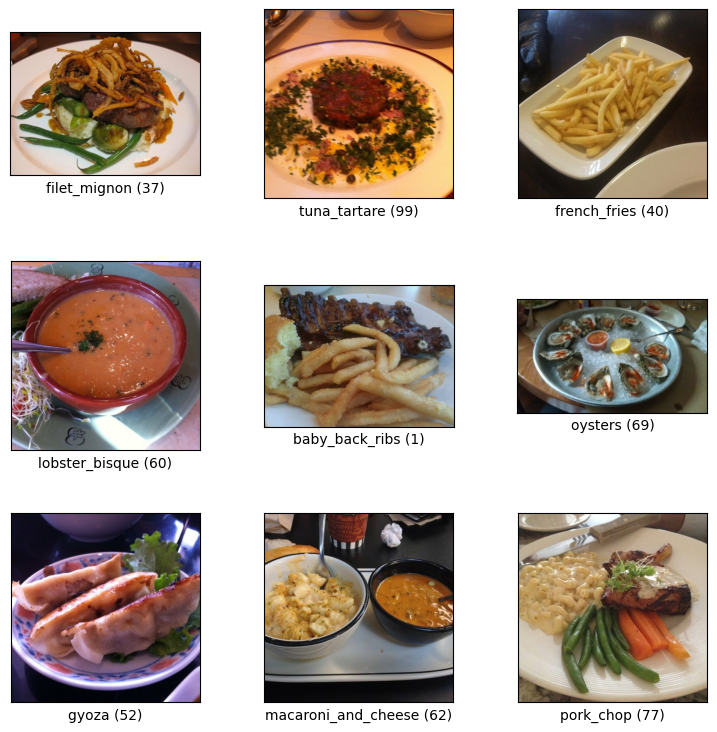

In [ ]:
figure_of_validation_data = tfds.show_examples(validation_data, ds_info)

In [ ]:
#Show features dictionary
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [ ]:
#show food classes
class_names = ds_info.features["label"].names
ten_first_classes =  class_names[:10]
ten_second_classes = class_names[10:20]
ten_third_classes = class_names[20:30]
ten_fourth_classes = class_names[30:40]
ten_fifth_classes = class_names[40:50]
ten_sixth_classes = class_names[50:60]
ten_seventh_classes = class_names[60:70]
ten_eigth_classes = class_names[70:80]
ten_ninth_classes = class_names[80:90]
ten_tenth_classes = class_names[90:100]
last_one_classes = class_names[100]
print(ten_first_classes)
print(ten_second_classes)
print(ten_third_classes)
print(ten_fourth_classes)
print(ten_fifth_classes)
print(ten_sixth_classes)
print(ten_seventh_classes)
print(ten_eigth_classes)
print(ten_ninth_classes)
print(ten_tenth_classes)
print(last_one_classes)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']
['bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla']
['chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes']
['deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras']
['french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich']
['grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna']
['lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'mi

In [ ]:
#take 1 sample of train data
train_sample = train_data.take(1)
train_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
for image, label in train_sample:
  print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Target class: {label}
  Class name: {class_names[label.numpy()]}
  """)


  Image shape: (512, 512, 3)
  Image dtype: <dtype: 'uint8'>
  Target class: 43
  Class name: fried_calamari
  


In [ ]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[71, 60, 56],
        [70, 59, 55],
        [70, 59, 55],
        ...,
        [65, 60, 67],
        [65, 60, 67],
        [64, 59, 66]],

       [[62, 51, 47],
        [64, 53, 49],
        [66, 55, 51],
        ...,
        [65, 60, 67],
        [65, 60, 67],
        [64, 59, 66]],

       [[61, 50, 46],
        [65, 54, 50],
        [68, 57, 53],
        ...,
        [66, 61, 68],
        [65, 60, 67],
        [63, 58, 65]],

       ...,

       [[63, 64, 66],
        [64, 65, 67],
        [67, 67, 69],
        ...,
        [45, 42, 49],
        [45, 42, 49],
        [45, 42, 49]],

       [[64, 64, 66],
        [64, 64, 66],
        [65, 65, 67],
        ...,
        [44, 41, 48],
        [44, 41, 48],
        [44, 41, 48]],

       [[62, 62, 64],
        [62, 62, 64],
        [62, 62, 64],
        ...,
        [43, 40, 47],
        [42, 39, 46],
        [42, 39, 46]]], dtype=uint8)>

In [ ]:
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

(-0.5, 511.5, 511.5, -0.5)

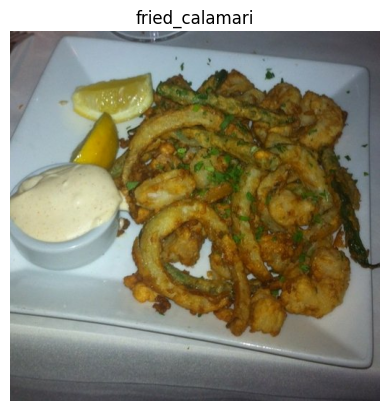

In [ ]:
title = class_names[label.numpy()]

plt.imshow(image)
plt.title(title)
plt.axis('off')

#DATA PREPROCESSING AND EXPLORATORY

In [ ]:
def preprocessing_image(image, label):
  image = tf.image.resize(image, [224, 224])
  return tf.cast(image, tf.float32), label

In [ ]:
preprocessed_image = preprocessing_image(image, label)[0]
image_shape = image.shape
image_dtype = image.dtype
preprocessed_image_shape = preprocessed_image.shape
preprocessed_image_dtype = preprocessed_image.dtype
print(f"Image before preprocessing:\n {image[:2]}...,\nShape: {image_shape},\nDatatype: {image_dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_image[:2]}...,\nShape: {preprocessed_image_shape},\nDatatype: {preprocessed_image_dtype}")

Image before preprocessing:
 [[[71 60 56]
  [70 59 55]
  [70 59 55]
  ...
  [65 60 67]
  [65 60 67]
  [64 59 66]]

 [[62 51 47]
  [64 53 49]
  [66 55 51]
  ...
  [65 60 67]
  [65 60 67]
  [64 59 66]]]...,
Shape: (512, 512, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing:
 [[[ 65.81122   54.811222  50.811222]
  [ 73.331635  62.331635  58.331635]
  [104.015305  89.80102   86.80102 ]
  ...
  [ 61.85712   59.071384  65.64286 ]
  [ 65.        60.        67.      ]
  [ 64.64282   59.642822  66.64282 ]]

 [[ 67.28571   56.285717  52.285717]
  [ 66.47449   55.47449   51.47449 ]
  [ 67.73979   53.525505  50.525505]
  ...
  [ 64.14284   61.3571    67.92857 ]
  [ 65.93368   60.933674  67.93368 ]
  [ 64.285645  59.285645  66.285645]]]...,
Shape: (224, 224, 3),
Datatype: <dtype: 'float32'>


(-0.5, 223.5, 223.5, -0.5)

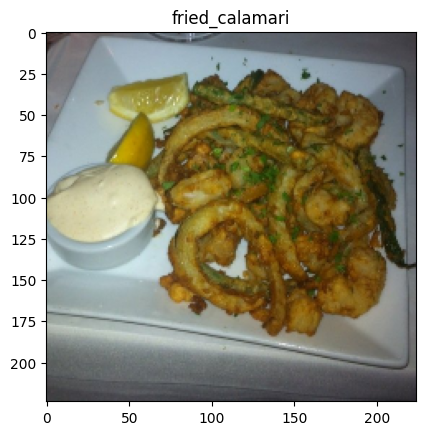

In [ ]:
title = class_names[label]

plt.imshow(preprocessed_image/255.)
plt.title(title)
plt.axis(True)

In [ ]:
buffer_size = 1000
batch_size = 32
autotune = tf.data.AUTOTUNE

In [ ]:
train_data = train_data.map(map_func=preprocessing_image, num_parallel_calls=autotune)
train_data = train_data.shuffle(buffer_size=buffer_size).batch(batch_size=batch_size).prefetch(buffer_size=autotune)
validation_data = validation_data.map(map_func=preprocessing_image, num_parallel_calls=autotune)
validation_data = validation_data.shuffle(buffer_size=buffer_size).batch(batch_size=batch_size).prefetch(buffer_size=autotune)

In [ ]:
train_data, validation_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

#Using Callbacks

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.75 and logs.get('val_accuracy')>0.75):
      print("\nReached more than 83% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
checkpoint_path = "efficientNetB4_model_checkpoints" # save weights in .ckpt
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=1)

#DATA MODELLING

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

def create_efficientnetB0_model(input_shape=(224, 224, 3)):
    # Load the ResNet-50 model pre-trained on ImageNet data
    base_model = EfficientNetB0(include_top=False, input_shape=input_shape)
    base_model_trainable = False
    inputs = layers.Input(shape=input_shape, name="input_layer")
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
    x = layers.Dense(len(class_names))(x)
    outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
    model = tf.keras.Model(inputs, outputs)

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create the model
model = create_efficientnetB0_model()

# Display the model summary
model.summary()

In [ ]:
callbacks = myCallback()
history_101_food_feature_extraction = model.fit(train_data,
                                                epochs=5,
                                                steps_per_epoch=len(train_data),
                                                validation_data=validation_data,
                                                validation_steps=int(0.15*len(validation_data)),
                                                callbacks=[callbacks,
                                                           model_checkpoint])

In [ ]:
evaluation_of_feature_extraction_model = model.evaluate(validation_data)

In [ ]:
evaluation_of_feature_extraction_model

In [ ]:
for layer in model.layers:
  layer.trainable=True
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

In [ ]:
reduce_learning_rate = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2,
                                                 patience=5,
                                                 verbose=1,
                                                 min_lr=1e-7)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [ ]:
history_101_food_fine_tuning = model.fit(train_data,
                                         epochs=10,
                                         steps_per_epoch=len(train_data),
                                         validation_data=validation_data,
                                         validation_steps=int(0.15*len(validation_data)),
                                         callbacks=[model_checkpoint,
                                                    callbacks,
                                                    reduce_learning_rate])

In [ ]:
evaluation_of_fine_tuning_model = model.evaluate(validation_data)

In [ ]:
evaluation_of_fine_tuning_model

In [ ]:
model.save('food101_model.h5')

In [ ]:
from google.colab import files
files.download('food101_model.h5')

#Citation

In [ ]:
@inproceedings{bossard14,
  title = {Food-101 -- Mining Discriminative Components with Random Forests},
  author = {Bossard, Lukas and Guillaumin, Matthieu and Van Gool, Luc},
  booktitle = {European Conference on Computer Vision},
  year = {2014}
}